In [1]:
import numpy as np
import pandas as pd
from IPython import display
import random
import math
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
set_default()

In [3]:
seed = 12345
random.seed(seed)
N = 1_000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

X = np.zeros((N * C, D))
y = np.zeros(N * C, dtype=int)
for c in range(C):
    index = 0
    t = np.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = np.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + np.random.random(N)
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * np.array((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (3000, 2)
y: (3000,)


In [4]:
def plot_data(X, y, d=0, auto=False, zoom=1):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)

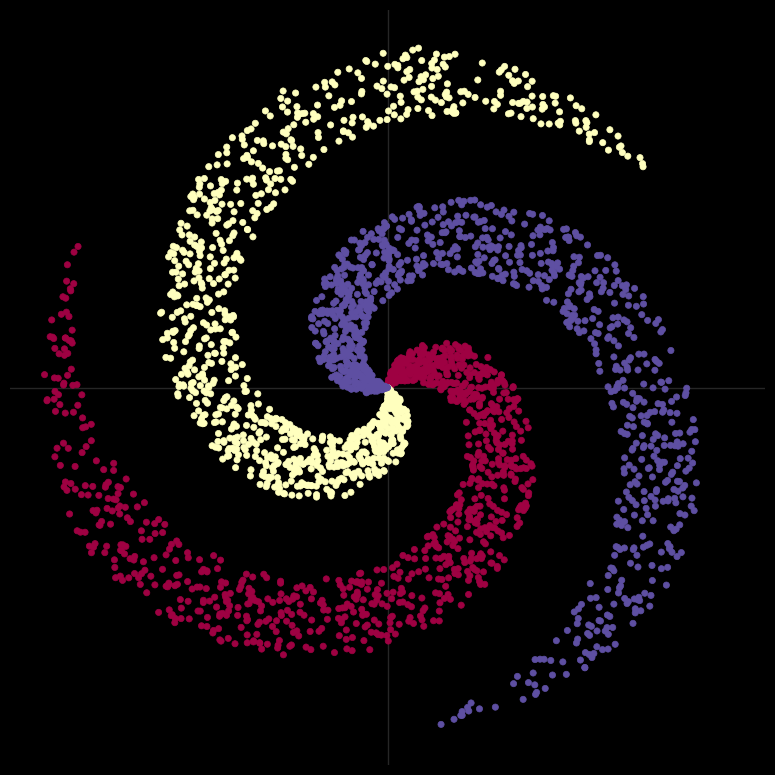

In [5]:
plot_data(X, y)

In [6]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [7]:
X_train = pd.DataFrame(X, columns=['x1', 'x2'])
rf.fit(X_train,y)
et.fit(X_train,y)

ExtraTreesClassifier()

In [54]:
def plot_model(X, y, model):
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    data = np.vstack((xx.reshape(-1), yy.reshape(-1))).T
    data = pd.DataFrame(data, columns=['x1', 'x2'])
    Z = model.predict_proba(data)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

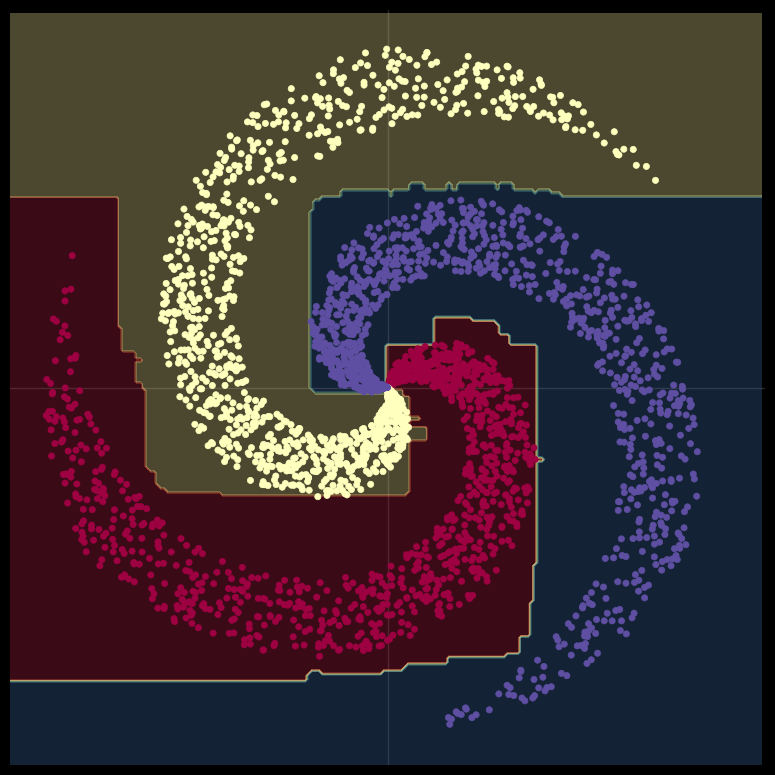

In [55]:
plot_model(X, y, rf)

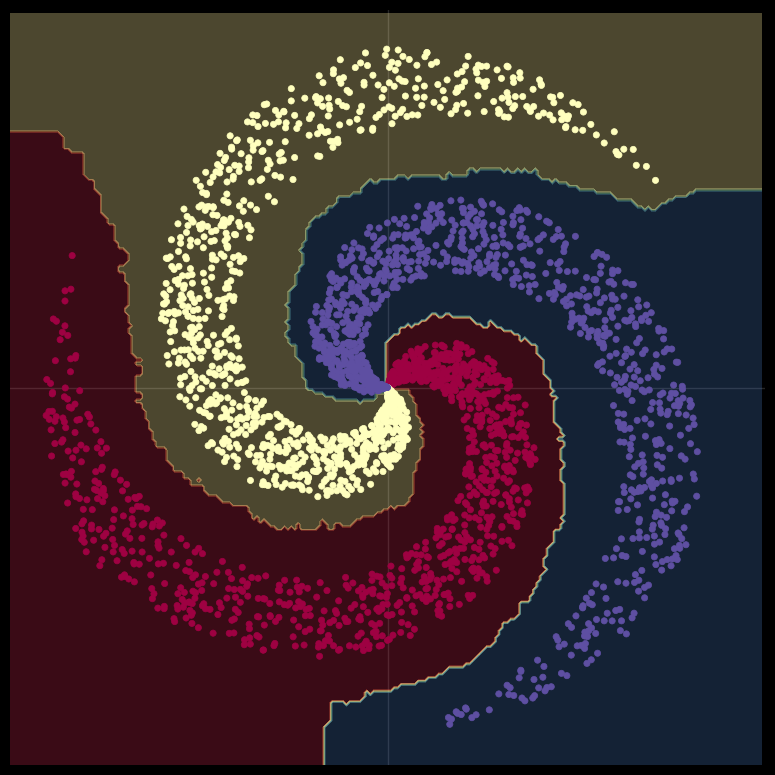

In [56]:
plot_model(X, y, et)

In [57]:
# save preprocessing objects and RF algorithm
joblib.dump(rf, "../models/random_forest.joblib", compress=True)
joblib.dump(et, "../models/extra_trees.joblib", compress=True)

['../models/extra_trees.joblib']

In [58]:
X[0]

array([0., 0.])

In [59]:
X_train

,x1,x2
0,0.000000,0.000000
1,0.000511,0.000861
2,0.000514,0.001935
3,0.000759,0.002905
4,0.000152,0.004001
...,...,...
2995,0.458935,-0.883961
2996,0.400380,-0.913071
2997,0.181498,-0.981356
2998,0.423303,-0.904883


In [60]:
rf.predict(X_train)

array([2, 0, 0, ..., 2, 2, 2])

In [61]:
input_data = {
            "x1": 0.5,
            "x2": 0.8,
}
input_data = pd.DataFrame(input_data, index=[0])
input_data

,x1,x2
0,0.5,0.8


In [62]:
prediction = rf.predict_proba(input_data)[0]

In [64]:
label = np.argmax(prediction)
label

1